# Aufgabe zu Daten Druckfestigkeit:

**Macht Sinn:**
- x-R-s-Karte
- Cp, Cpk
- Lauflängen $ARL_0$ und $ARL_1$

**Macht keinen Sinn:**
- ANOVA
- Lineare Regression
- QQ-Plot, usw.
- Welche Annhamen man für ANOVA machen muss.
- Auflösung
- Fraktion

- p-Karte

## Informationen:
**Shewart-Karten:**
- Zwei Einzelkarten
- Annahme, dass Qualitätsmerkmale normalverteilt sind.
- Zuerst Karte für die Variation, erst wenn diese unter Kontrolle, wird die Karte für den Mittelwert erstellt.

**Prozessfähigkeit:**
- Es wird angenommen, dass die Qualitätsmerkmale normalverteilt sind.
- Der Prozess ist unter Kontrolle
- Der Mindestwert $LSL$ und der Höchstwert $USL$ sind vordefiniert. 

In [1]:
import numpy as np
import pandas as pd
import src.Shewart as sh

In [2]:
df = pd.read_csv("./Daten/Druckfestigkeit.csv")
df

,Batch,x1,x2,x3,x4,x5
0,1,48.67,48.40,51.44,49.38,52.81
1,2,50.97,48.88,52.23,51.94,49.08
2,3,51.95,51.39,47.05,52.63,49.86
3,4,47.84,50.03,50.31,49.42,49.10
4,5,51.32,49.94,48.07,49.38,50.65
5,6,51.04,51.95,50.42,50.07,52.91
6,7,49.63,51.20,51.74,55.05,52.58
7,8,48.35,49.98,47.11,49.93,50.46
8,9,52.30,49.92,50.68,49.04,49.96
9,10,50.87,49.89,51.56,50.87,50.29


In [3]:
X = df[["x1","x2","x3","x4","x5"]].to_numpy()
X

array([[48.67, 48.4 , 51.44, 49.38, 52.81],
       [50.97, 48.88, 52.23, 51.94, 49.08],
       [51.95, 51.39, 47.05, 52.63, 49.86],
       [47.84, 50.03, 50.31, 49.42, 49.1 ],
       [51.32, 49.94, 48.07, 49.38, 50.65],
       [51.04, 51.95, 50.42, 50.07, 52.91],
       [49.63, 51.2 , 51.74, 55.05, 52.58],
       [48.35, 49.98, 47.11, 49.93, 50.46],
       [52.3 , 49.92, 50.68, 49.04, 49.96],
       [50.87, 49.89, 51.56, 50.87, 50.29]])

## Kontrollgrenzen:

In [4]:
from src.boundries import limits_R,limits_xr,limits_s,limits_xs

In [5]:
limits_R(X)
limits_xr(X)


    +---------------------+---------+
    | Kontrollgrenze      | Wert    |
    +---------------------+---------+
    | L3                  | -0.42 |
    | L2                  | 0.91 |
    | L1                  | 2.23 |
    | C                   | 3.56  |
    | U1                  | 4.89 |
    | U2                  | 6.21 |
    | U3                  | 7.54 |
    +---------------------+---------+
    

    +---------------------+---------+
    | Kontrollgrenze      | Wert    |
    +---------------------+---------+
    | L3                  | 48.36 |
    | L2                  | 49.04 |
    | L1                  | 49.73 |
    | C                   | 50.41  |
    | U1                  | 51.10 |
    | U2                  | 51.78 |
    | U3                  | 52.46 |
    +---------------------+---------+
    


In [6]:
limits_s(X)
limits_xs(X)


    +---------------------+---------+
    | Kontrollgrenze      | Wert    |
    +---------------------+---------+
    | L3                  | -0.13 |
    | L2                  | 0.39 |
    | L1                  | 0.91 |
    | C                   | 1.43  |
    | U1                  | 1.95 |
    | U2                  | 2.47 |
    | U3                  | 2.99 |
    +---------------------+---------+
    

    +---------------------+---------+
    | Kontrollgrenze      | Wert    |
    +---------------------+---------+
    | L3                  | 48.37 |
    | L2                  | 49.05 |
    | L1                  | 49.73 |
    | C                   | 50.41  |
    | U1                  | 51.09 |
    | U2                  | 51.77 |
    | U3                  | 52.45 |
    +---------------------+---------+
    


## R und xr-Karte:

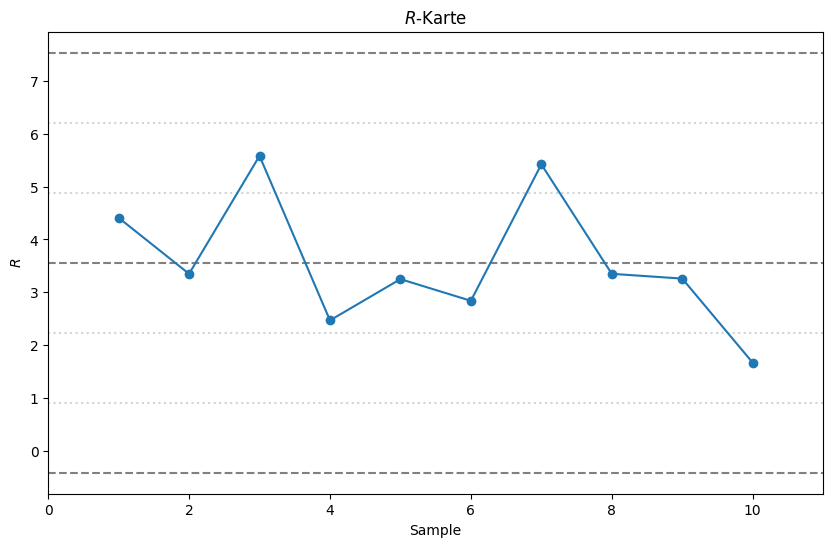

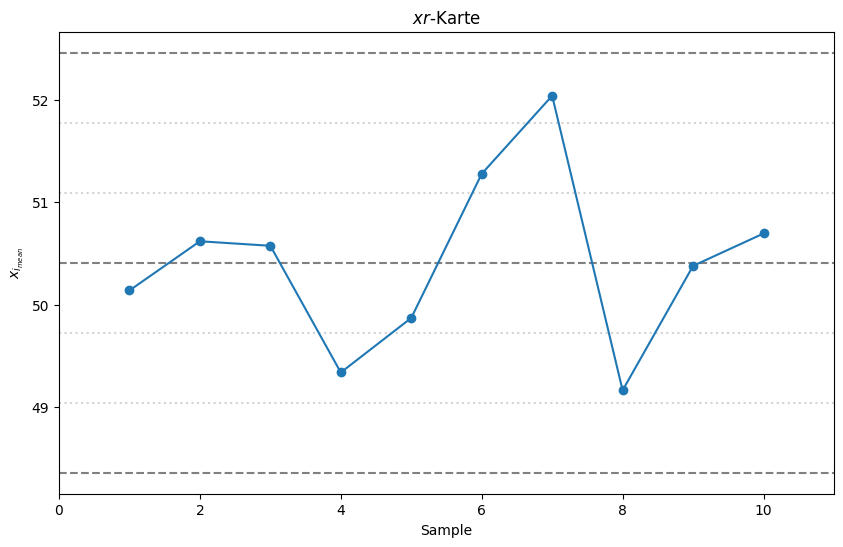

In [7]:
sh.shewart_R(X)
sh.shewart_xr(X)

- Die R-Karte ist unter Kontrolle:

- Die xr-Karte ist nicht unter Kontrolle, da von Sample 4 bis Sample 8. 4 von 5 dieser Punkte in Zone B oder ausserhalb liegen.

## s und xs-Karte:

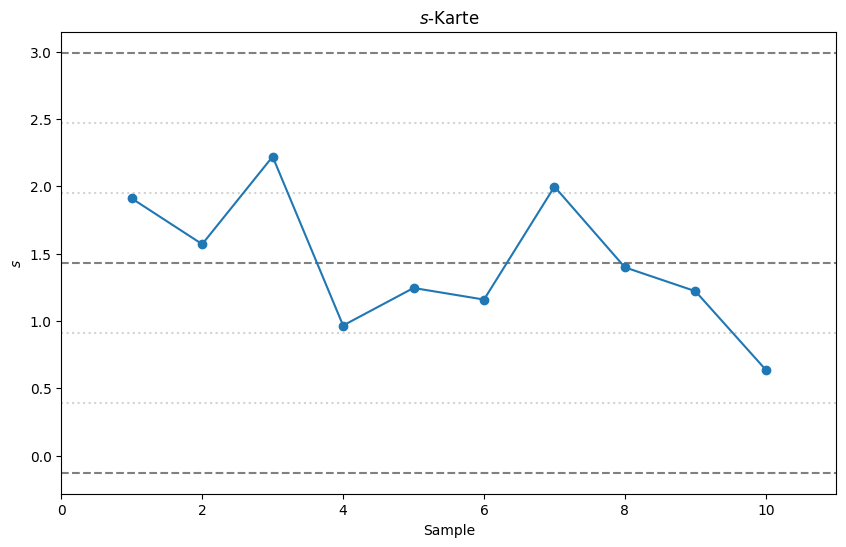

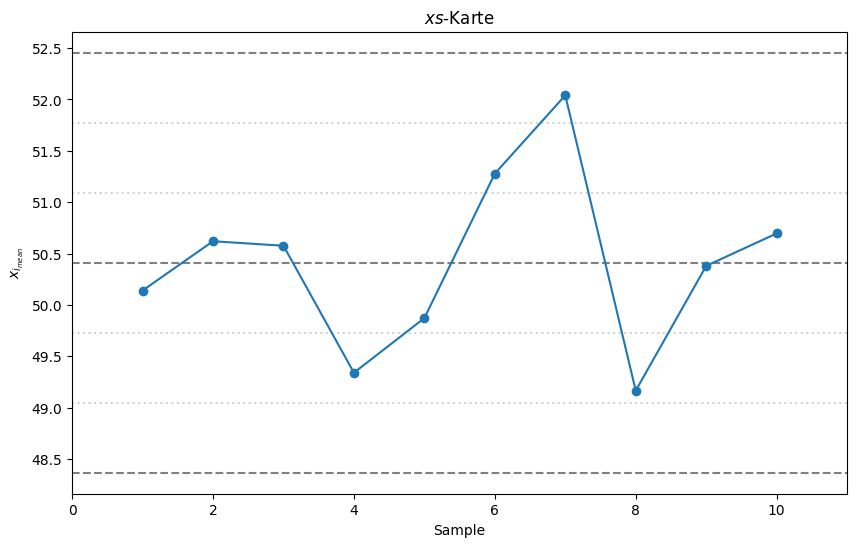

In [8]:
sh.shewart_s(X)
sh.shewart_xs(X)

- Die s-Karte ist unter Kontrolle:

- Die xs-Karte ist nicht unter Kontrolle, da von Sample 4 bis Sample 8 die Regeln verletzt sind 4 von 5 dieser Punkte liegen in Zone B oder ausserhalb liegen.

## Bewertung: 
*Western Electric Rules:*
- Falls ein Punkt ausserhalb von Zone A liegt (diese Kriterium kennen wir bereits)
- Falls zwei von drei aufeinanderfolgenden Punkte in Zone A oder ausserhalb liegen.
- Falls vier von fünf aufeinanderfolgenden Punkte in Zone B oder ausserhalb liegen.
- Falls neun aufeinanderfolgenden Punkte auf der gleichen Seite von 
 liegen (man nennt das dann einen Run)

## Lauflänge:

In [9]:
p = 0.0027
ARL0 = 1/p
ARL0

370.3703703703703

Wahrscheinlichkeit das ein Falscheralarm bereits vor der 100 Beobachtung auftritt:

In [10]:
from scipy.stats import geom

In [11]:
geom.cdf(99,p)

np.float64(0.2348332582675674)

In [12]:
from src.OCuG import oc
from src.estimator import Schätzer_sig,Schätzer_mu

In [13]:
m  = 5 # Sampels pro Batch
sig = Schätzer_sig(X)
abweichung  = 1 # muss angepasst werden.
k = abweichung/sig

Der Schätzer Sigma_Dach ist 1.5235 


In [14]:
Operation = oc(k,m)
Operation

np.float64(0.9372640072319564)

In [15]:
ARL1 = 1/(1-Operation)
ARL1

np.float64(15.939813110112738)

- $ARL_0$ sollte möglichst gross sein.
- $ARL_1$ sollte möglichst klein sein.

## Prozessfähigkeit:

- Muss Normalverteilt sein.
- $C_p$ ist der Prozessfähigkeitsindex wenn der Prozess zentriert ist.
- $C_pk$ ist der kritische Prozessfähigkeitsindex wenn der Prozess nicht-zentriert ist.

In [16]:
from src.norm import QQ_plot, shapiro
from src.capability import Cp,Cpk

Teststatistik = 0.9870422171989914
p-Wert = 0.8545758766660945


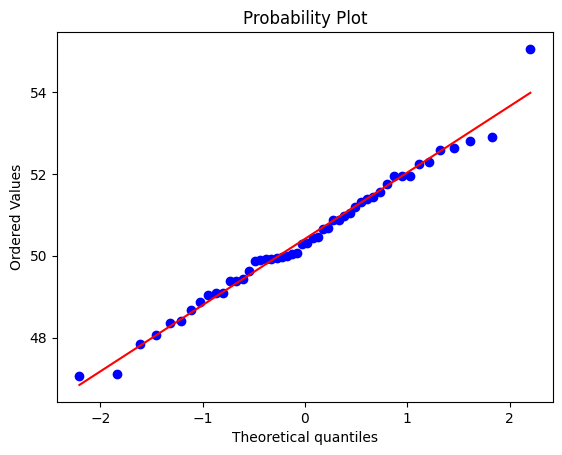

In [17]:
# Auf Normalverteilung prüfen.
QQ_plot(X)
shapiro(X)

Es ist Normalverteilt.

In [18]:
# Muss geändert werden!!!!!!!!
C  = 50
# Muss geändert werden!!!!!!!!
LSL = 46
# Muss geändert werden!!!!!!!!
USL = 54

In [19]:
mu = Schätzer_mu(X)
sig = Schätzer_sig(X)

Der Erwartungwert mu0 ist 50.4108
Der Schätzer Sigma_Dach ist 1.5235 


In [20]:
Cp(USL=USL,LSL=LSL,sigma=sig)
Cp1 = 0.88

Der Prozessfähigkeits-Index berägt 0.88


In [21]:
Cpk(USL=USL,LSL=LSL,sigma=sig,mu=mu)
Cpk1 = 0.79

C_pk ist 0.79


In [25]:
# Konfidenzintervall
from src.constants import c4
import scipy.stats as st
m = 5
n = 10

# Muss angepasst werden!!!!!!!!!
alpha = 0.05 
z = st.norm.ppf(1-alpha/2)

In [23]:
fac = z * np.sqrt(1-c4(m)**2)/np.sqrt(n)
Cp_low = Cp1/(1 + fac)
Cp_up = Cp1/(1 - fac)

print(f"Konfidenzintervall: [{round(Cp_low,3)}, {round(Cp_up,3)}]")

Konfidenzintervall: [0.726, 1.116]


In [24]:
# Erwarteter Ausschussanteil:
p1 = 1 - st.norm(loc=mu,scale=sig).cdf(USL)
p2 = st.norm(loc=mu,scale=sig).cdf(LSL)

print("Ausschussanteil: ", np.round(100 * (p1 + p2), 2), "%")

Ausschussanteil:  1.11 %
